In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.10f}'.format

In [9]:
df = pd.read_csv('../datasets/pepeusdt_15m.csv')
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,1719606278429,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573175,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54918803914.0000000000,915,False,646195.5187450800,30580076845.0000000000,359857.6444073500,0
1,kline,1719606281084,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573176,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54929553163.0000000000,916,False,646321.8224208300,30580076845.0000000000,359857.6444073500,0
2,kline,1719606283972,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573177,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54930403503.0000000000,917,False,646331.8224192300,30580927185.0000000000,359867.6444057500,0
3,kline,1719606286973,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573179,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54957530981.0000000000,919,False,646650.5702857299,30580927185.0000000000,359867.6444057500,0
4,kline,1719606290973,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573180,0.0000117600,0.0000117600,0.0000117900,0.0000117400,55189023018.0000000000,920,False,649372.9166408500,30812419222.0000000000,362589.9907608700,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84980 entries, 0 to 84979
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_type                    84980 non-null  object 
 1   event_time                    84980 non-null  int64  
 2   symbol                        84980 non-null  object 
 3   kline_start_time              84980 non-null  int64  
 4   kline_close_time              84980 non-null  int64  
 5   interval                      84980 non-null  object 
 6   first_trade_id                84980 non-null  int64  
 7   last_trade_id                 84980 non-null  int64  
 8   open_price                    84980 non-null  float64
 9   close_price                   84980 non-null  float64
 10  high_price                    84980 non-null  float64
 11  low_price                     84980 non-null  float64
 12  volume                        84980 non-null  float64
 13  n

In [11]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [12]:
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 20:24:38.429,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573175,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54918803914.0000000000,915,False,646195.5187450800,30580076845.0000000000,359857.6444073500,0
1,kline,2024-06-28 20:24:41.084,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573176,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54929553163.0000000000,916,False,646321.8224208300,30580076845.0000000000,359857.6444073500,0
2,kline,2024-06-28 20:24:43.972,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573177,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54930403503.0000000000,917,False,646331.8224192300,30580927185.0000000000,359867.6444057500,0
3,kline,2024-06-28 20:24:46.973,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573179,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54957530981.0000000000,919,False,646650.5702857299,30580927185.0000000000,359867.6444057500,0
4,kline,2024-06-28 20:24:50.973,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573180,0.0000117600,0.0000117600,0.0000117900,0.0000117400,55189023018.0000000000,920,False,649372.9166408500,30812419222.0000000000,362589.9907608700,0


In [13]:
df = df.sort_values(by='event_time')

In [14]:
df[df['event_time'].duplicated(keep=False)]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore


In [10]:
df['time_diff_event_time'] = df['event_time'].diff()
df['event_time_seconds'] = df['time_diff_event_time'].dt.total_seconds()
df['event_time_seconds'] = df['event_time_seconds'].round().astype('Int64')

In [12]:
mean = df['event_time_seconds'].mean()
std = df['event_time_seconds'].std()


df['z_score'] = (df['event_time_seconds'] - mean) / std
anomalies = df[df['z_score'].abs() > 3]
anomalies[['event_time_seconds', 'z_score']].sort_values(ascending=False, by='event_time_seconds')

,event_time_seconds,z_score
51669,1625,279.6317723324
24714,28,4.2735496621
23956,28,4.2735496621
26279,28,4.2735496621
19523,26,3.9287053006
9435,26,3.9287053006
3736,25,3.7562831198
80949,25,3.7562831198
81117,25,3.7562831198
21398,24,3.5838609390


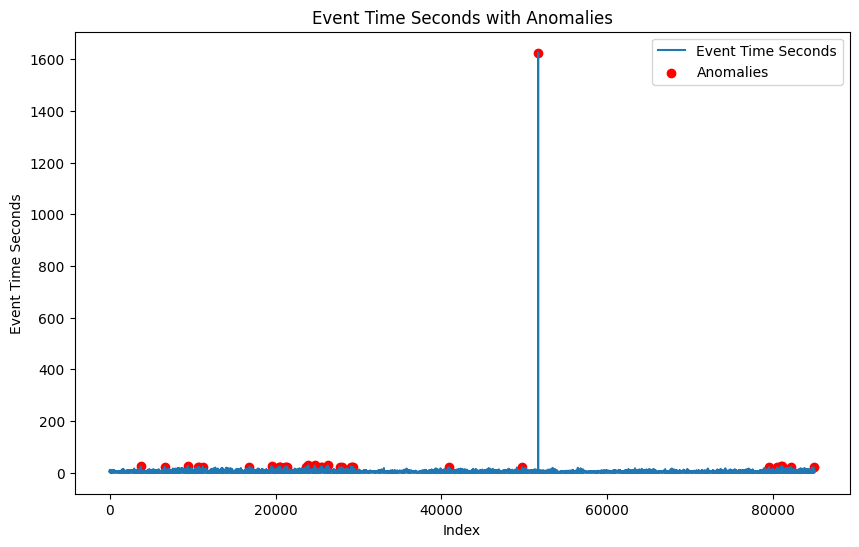

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['event_time_seconds'], label='Event Time Seconds')
plt.scatter(anomalies.index, anomalies['event_time_seconds'], color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Event Time Seconds')
plt.title('Event Time Seconds with Anomalies')
plt.legend()
plt.show()

In [15]:
df.loc[51668:51670]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time_diff_event_time,event_time_seconds,z_score
51668,kline,2024-06-30 19:57:44.742,PEPEUSDT,2024-06-30 19:45:00,2024-06-30 19:59:59.999,15m,132181759,132184161,0.0000116300,0.0000116200,0.0000116600,0.0000115900,110669536406.0000000000,2403,False,1286225.9928179099,62371576635.0000000000,725219.4077923601,0,0 days 00:00:03.962000,4,0.1354173239
51669,kline,2024-06-30 20:24:49.402,PEPEUSDT,2024-06-30 20:15:00,2024-06-30 20:29:59.999,15m,132186994,132189414,0.0000116200,0.0000116600,0.0000116800,0.0000116100,143981033346.0000000000,2421,False,1677856.4287430700,100887982885.0000000000,1176024.5714325199,0,0 days 00:27:04.660000,1625,279.6317723324
51670,kline,2024-06-30 20:24:51.882,PEPEUSDT,2024-06-30 20:15:00,2024-06-30 20:29:59.999,15m,132186994,132189416,0.0000116200,0.0000116600,0.0000116800,0.0000116100,144008319842.0000000000,2423,False,1678174.5892864300,100887982885.0000000000,1176024.5714325199,0,0 days 00:00:02.480000,2,-0.2094270376


In [15]:
split_index = 51668

df1 = df.iloc[:split_index] 
df2 = df.iloc[split_index:]

train_1 = df1[df1['is_kline_closed'] == True]
train_2 = df2[df2['is_kline_closed'] == True]

combined_df = pd.concat([train_1, train_2], ignore_index=True)
combined_df  = combined_df .sort_values(by='event_time')
combined_df .head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 20:30:00.010,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573931,0.0000117600,0.0000117300,0.0000117900,0.0000117100,77034459569.0000000000,1671,True,905744.4611785000,38627523391.0000000000,454332.0434678300,0
1,kline,2024-06-28 20:45:00.010,PEPEUSDT,2024-06-28 20:30:00,2024-06-28 20:44:59.999,15m,131573932,131578050,0.0000117300,0.0000117000,0.0000117900,0.0000116700,149993939210.0000000000,4119,True,1757968.6877820501,65848676093.0000000000,771883.8538101000,0
2,kline,2024-06-28 21:00:00.012,PEPEUSDT,2024-06-28 20:45:00,2024-06-28 20:59:59.999,15m,131578051,131581785,0.0000117100,0.0000116600,0.0000117400,0.0000116200,107684329890.0000000000,3735,True,1256201.3578377001,44359445340.0000000000,518086.9603612100,0
3,kline,2024-06-28 21:15:00.012,PEPEUSDT,2024-06-28 21:00:00,2024-06-28 21:14:59.999,15m,131581786,131602465,0.0000116600,0.0000114900,0.0000116600,0.0000113800,579395615623.0000000000,20680,True,6666549.8866011798,225557997364.0000000000,2594463.1501727798,0
4,kline,2024-06-28 21:30:00.011,PEPEUSDT,2024-06-28 21:15:00,2024-06-28 21:29:59.999,15m,131602466,131608221,0.0000114900,0.0000115800,0.0000115900,0.0000114900,243299823748.0000000000,5756,True,2810839.6105832998,143155682567.0000000000,1653881.1501677900,0


Correlation Matrix:


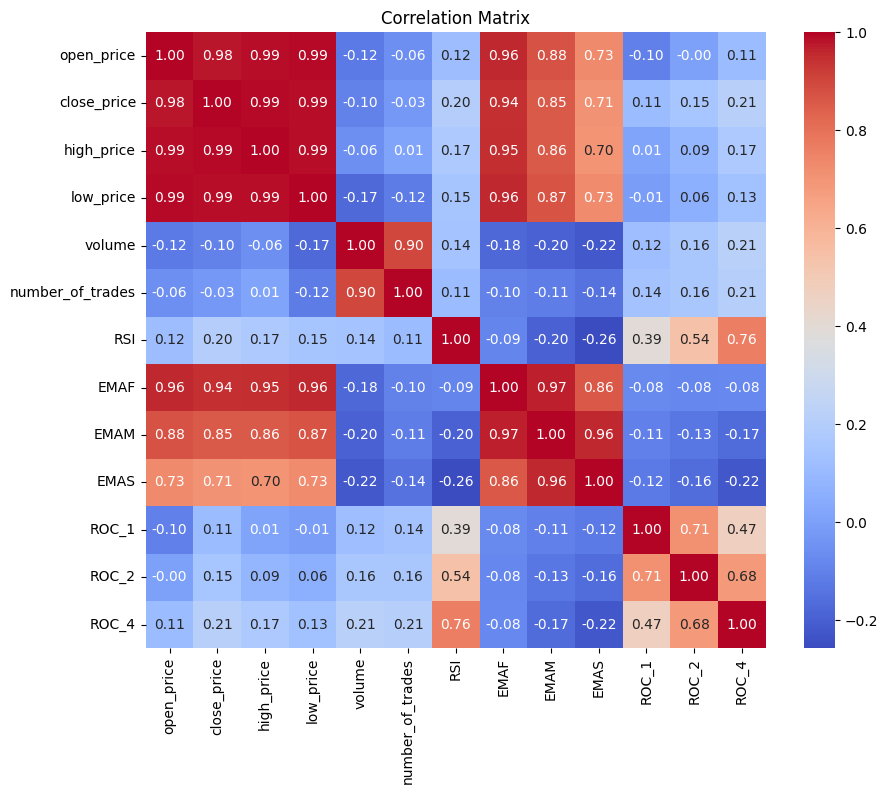

299


,open_price,close_price,high_price,low_price,volume,number_of_trades,RSI,EMAF,EMAM,EMAS,ROC_1,ROC_2,ROC_4
5,0.0000115700,0.0000115400,0.0000115700,0.0000115200,119443348139.0000000000,2144,24.3243243243,0.0000116459,0.0000116846,0.0000117048,-0.3454231434,0.4351610096,-1.3675213675
6,0.0000115400,0.0000115700,0.0000115900,0.0000114900,150622150378.0000000000,3107,30.0000000000,0.0000116342,0.0000116762,0.0000116995,0.2599653380,-0.0863557858,-0.7718696398
7,0.0000115700,0.0000115100,0.0000115700,0.0000114900,129878256101.0000000000,2878,27.9069767442,0.0000116151,0.0000116638,0.0000116921,-0.5185825411,-0.2599653380,0.1740644038
8,0.0000115100,0.0000114600,0.0000115300,0.0000114500,144007032901.0000000000,2960,27.2727272727,0.0000115913,0.0000116487,0.0000116830,-0.4344048653,-0.9507346586,-1.0362694301
9,0.0000114600,0.0000115400,0.0000115500,0.0000114500,90003380195.0000000000,1977,57.1428571429,0.0000115834,0.0000116407,0.0000116773,0.6980802792,0.2606429192,0.0000000000


In [16]:
columns_to_drop = [
    'ignore', 'is_kline_closed', 'event_time', 'symbol',
    'kline_start_time', 'kline_close_time', 'interval', 'event_type',
    'quote_assest_volume', 'take_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'first_trade_id', 'last_trade_id'
]

combined_df = combined_df.drop(columns=columns_to_drop)

#RSI CALCULATION
def calculate_rsi(data, window=6):
    
    delta = data['close_price'].diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss

    rsi = 100 - (100 / (1 + rs))

    return rsi

combined_df['RSI'] = calculate_rsi(combined_df)


#EMAs CALCULATION
def calculate_ema(combined_df, span):
    return combined_df['close_price'].ewm(span=span, adjust=False).mean()

combined_df['EMAF'] = calculate_ema(combined_df, span=12)
combined_df['EMAM'] = calculate_ema(combined_df, span=26)
combined_df['EMAS'] = calculate_ema(combined_df, span=50)

#ROC CALCULATION
def calculate_roc(combined_df, n):
    return ((combined_df['close_price'] - combined_df['close_price'].shift(n)) / combined_df['close_price'].shift(n)) * 100


combined_df['ROC_1'] = calculate_roc(combined_df, 1)
combined_df['ROC_2'] = calculate_roc(combined_df, 2)
combined_df['ROC_4'] = calculate_roc(combined_df, 4)


combined_df = combined_df.dropna(subset=['close_price', 'RSI', 'ROC_1', 'ROC_2','ROC_4'])

correlation_matrix = combined_df.corr()

print("Correlation Matrix:")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print(len(combined_df))
combined_df.head()

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  
        y.append(data[i + seq_length, -1])     # ROC_1 as target
    return np.array(X), np.array(y)


sequence_length = 10  
n_features = scaled_data.shape[1] - 1  
n_units = 50  


X, y = create_sequences(scaled_data, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], n_features))


split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(n_units, input_shape=(sequence_length, n_features)))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Predictions
predictions = model.predict(X_test)

Epoch 1/50


c:\Users\HP\Desktop\Projects\tradingbot\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0888 - val_loss: 0.0276
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0400 - val_loss: 0.0218
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0273 - val_loss: 0.0156
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0227 - val_loss: 0.0161
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0217 - val_loss: 0.0158
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - val_loss: 0.0141
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0203 - val_loss: 0.0133
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190 - val_loss: 0.0128
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0203 - val_loss: 0.0124
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192 - val_loss: 0.0121
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0167 - val_loss: 0.0116
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0200 - val_loss: 0.0112
Epoch 13/50
8/8 

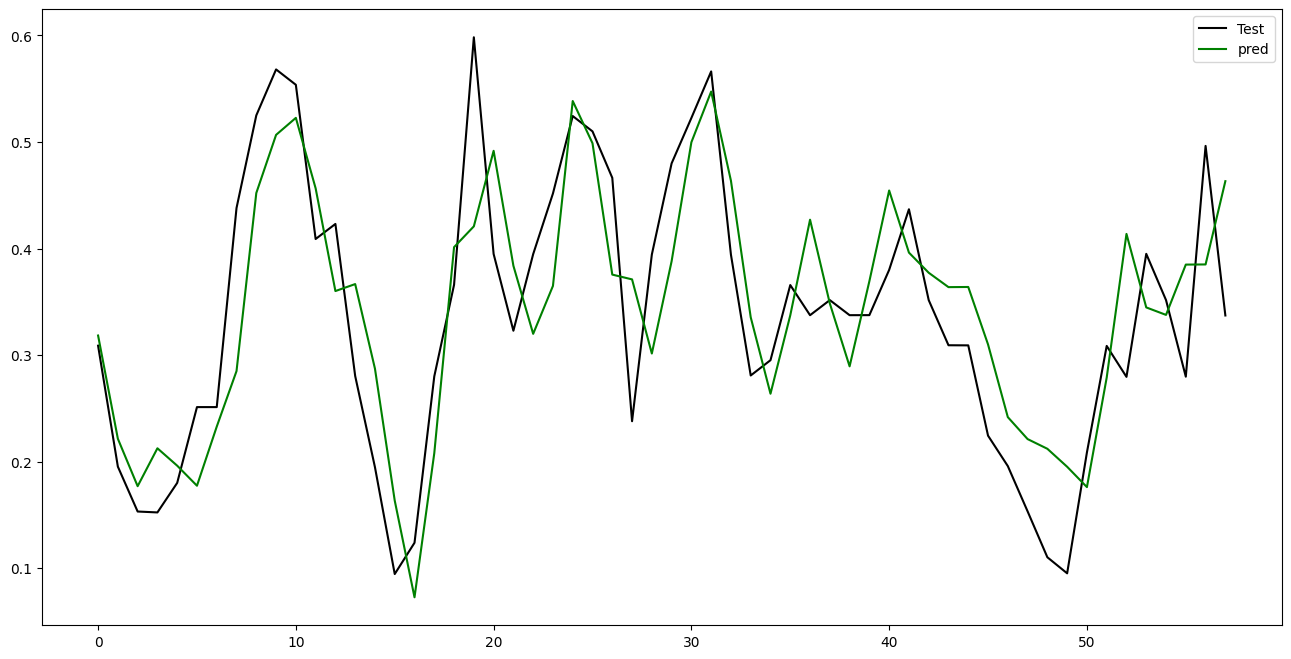

In [19]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(predictions, color = 'green', label = 'pred')
plt.legend()
plt.show()